Have you see the movie "The Mitchells vs The Machines"?  The dog Monchi is a pug and confuses the robots.  They struggle to determine if he is a dog, pig, or loaf of bread.

Lets put it to the test!  Cause yes, that's what a middle-aged child would do :lol:

In [31]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")


In [32]:
!pip install -Uqq fastai duckduckgo_search

In [33]:
from duckduckgo_search import ddg_images
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(DDGS().images(term, max_results=max_images)).itemgot('image')

Searching for 'pug dog photos'


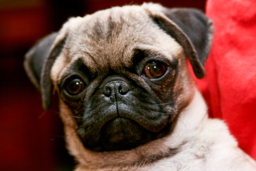

In [34]:
from fastdownload import download_url
urls = search_images('pug dog photos', max_images=1)

dest = 'pug.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for '"adult pug face only no body" photos'


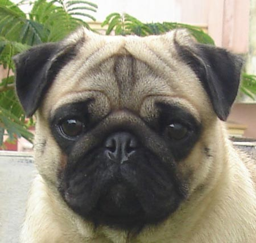

In [35]:
from fastdownload import download_url
urls = search_images('"adult pug face only no body" photos', max_images=1)

dest = 'pug-face.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for '"pug dog full body" photos'


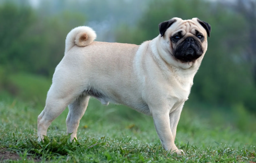

In [36]:
from fastdownload import download_url
urls = search_images('"pug dog full body" photos', max_images=1)

dest = 'pug-full.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [7]:
searches = 'dog','pig','"loaf of bread"'
path = Path('training_data/mvm')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'dog photo'
Searching for 'dog sun photo'
Searching for 'dog shade photo'
Searching for 'pig photo'
Searching for 'pig sun photo'
Searching for 'pig shade photo'
Searching for '"loaf of bread" photo'
Searching for '"loaf of bread" sun photo'
Searching for '"loaf of bread" shade photo'


/opt/app-root/lib64/python3.9/site-packages/PIL/Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

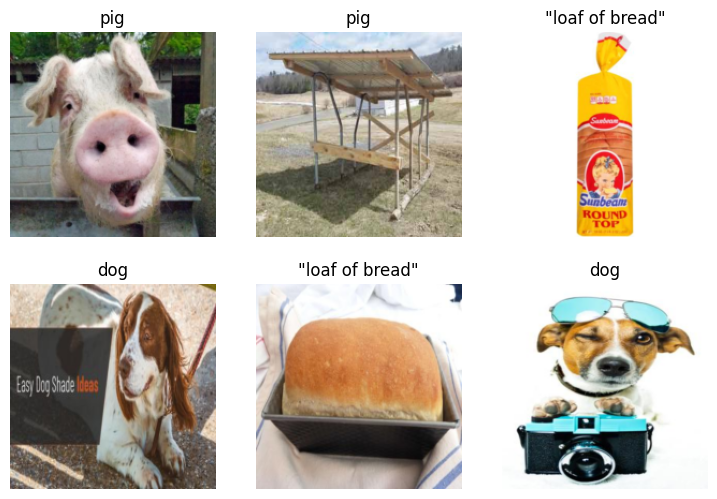

In [37]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [42]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.985401,0.226583,0.081633,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.302425,0.173029,0.040816,00:08
1,0.192567,0.149814,0.061224,00:08
2,0.131486,0.169902,0.040816,00:08
3,0.101425,0.164950,0.061224,00:08
4,0.080045,0.165957,0.040816,00:08
5,0.063176,0.179071,0.040816,00:08
6,0.051462,0.190613,0.040816,00:08
7,0.044251,0.197178,0.040816,00:08
8,0.036958,0.192262,0.040816,00:08
9,0.031778,0.196350,0.040816,00:08


In [43]:
category,category_num,probs = learn.predict(PILImage.create('pug.jpg'))
print(f"This is a: {category} ({category_num}).")
print(f"Probability it's a {category}: {probs[category_num]:.4f}")

This is a: "loaf of bread" (0).
Probability it's a "loaf of bread": 0.6807


In [44]:
category,category_num,probs = learn.predict(PILImage.create('pug-face.jpg'))
print(f"This is a: {category} ({category_num}).")
print(f"Probability it's a {category}: {probs[category_num]:.4f}")

This is a: dog (1).
Probability it's a dog: 0.8850


In [45]:
category,category_num,probs = learn.predict(PILImage.create('pug-full.jpg'))
print(f"This is a: {category} ({category_num}).")
print(f"Probability it's a {category}: {probs[category_num]:.4f}")

This is a: dog (1).
Probability it's a dog: 0.9996
